In [2]:
import pandas as pd

In [12]:
demos = pd.read_pickle("./cs285/experts/expert_data_Cartpole-v1.pkl")

In [15]:
demos[0]["terminal"].shape

(1000,)

In [14]:
demos[1]["observation"].shape

(1000, 4)

In [7]:
demos[1]["reward"].shape

(1000,)

In [14]:
len(demos)

2

In [25]:
demos = pd.read_pickle("./cs285/experts/expert_data_Hopper-v4.pkl")

In [26]:
demos[1]["observation"].shape

(1000, 11)

In [27]:
demos[1]["reward"].shape

(1000,)

In [18]:
len(demos)

2

In [34]:
demos = pd.read_pickle("./cs285/experts/expert_data_Cartpole-v1.pkl")

In [36]:
demos[0]["observation"].shape

(1000, 4)

In [38]:
demos[0]["reward"].shape

(1000,)

In [39]:
len(demos)

2

In [19]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(
    n_clusters=None, metric="l2", linkage="average", distance_threshold=0.5
)

In [2]:
import numpy as np

clustering_model.fit(np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]]))

NameError: name 'clustering_model' is not defined

In [34]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd


def parse_tensorboard(path, scalars):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _absorb_print = ea.Reload()
    print(ea.Tags())
    # make sure the scalars are in the event accumulator tags
    assert all(
        s in ea.Tags()["scalars"] for s in scalars
    ), "some scalars were not found in the event accumulator"
    return {k: pd.DataFrame(ea.Scalars(k)) for k in scalars}

In [35]:
rollout_stats = [
    "rollout/return_max",
    "rollout/return_mean",
    "rollout/return_min",
    "rollout/return_std",
]
stats = parse_tensorboard(
    "logs/ant/bc_06_23:34:40",
    rollout_stats,
)

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['batch_size', 'bc/batch', 'bc/ent_loss', 'bc/entropy', 'bc/epoch', 'bc/l2_loss', 'bc/l2_norm', 'bc/loss', 'bc/neglogp', 'bc/prob_true_act', 'bc/samples_so_far', 'rollout/return_max', 'rollout/return_mean', 'rollout/return_min', 'rollout/return_std'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


<Axes: >

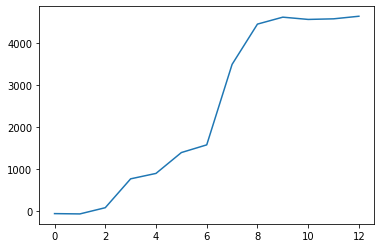

In [40]:
stats["rollout/return_mean"].value.plot()

In [6]:
from scipy import stats

stats.mode([1, 1, 2, 3], keepdims=False).mode

1

In [4]:
import numpy as np

np.percentile(np.array([1, 2, 3]), 20)

1.4

In [6]:
from numpy import load

data = load("evaluations.npz")
lst = data.files
for item in lst:
    print(item)
    print(data[item])

timesteps
[   4000    8000   12000   16000   20000   24000   28000   32000   36000
   40000   44000   48000   52000   56000   60000   64000   68000   72000
   76000   80000   84000   88000   92000   96000  100000  104000  108000
  112000  116000  120000  124000  128000  132000  136000  140000  144000
  148000  152000  156000  160000  164000  168000  172000  176000  180000
  184000  188000  192000  196000  200000  204000  208000  212000  216000
  220000  224000  228000  232000  236000  240000  244000  248000  252000
  256000  260000  264000  268000  272000  276000  280000  284000  288000
  292000  296000  300000  304000  308000  312000  316000  320000  324000
  328000  332000  336000  340000  344000  348000  352000  356000  360000
  364000  368000  372000  376000  380000  384000  388000  392000  396000
  400000  404000  408000  412000  416000  420000  424000  428000  432000
  436000  440000  444000  448000  452000  456000  460000  464000  468000
  472000  476000  480000  484000  488000 

In [15]:
data["ep_lengths"]

array([[ 10,  10,  10,  10,  10],
       [  9,  10,  10,  11,  11],
       [  8,   8,   9,  10,  11],
       ...,
       [ 36, 103, 500, 500, 500],
       [ 35, 500, 500, 500, 500],
       [ 30,  36,  52,  53, 500]])

In [13]:
lst

['timesteps', 'results', 'ep_lengths']

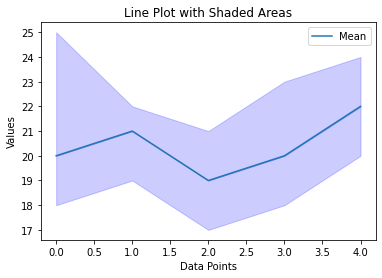

In [17]:
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
mean_values = [20, 21, 19, 20, 22]
min_values = [18, 19, 17, 18, 20]
max_values = [25, 22, 21, 23, 24]

# Ensure that all lists are of the same length
if not (len(mean_values) == len(min_values) == len(max_values)):
    raise ValueError("All lists must be of the same length.")

# Plotting
plt.plot(mean_values, label="Mean")
plt.fill_between(
    range(len(mean_values)), min_values, mean_values, color="blue", alpha=0.2
)
plt.fill_between(
    range(len(mean_values)), mean_values, max_values, color="blue", alpha=0.2
)

# Finalizing the Plot
plt.title("Line Plot with Shaded Areas")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.show()